In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 1. Đọc và chuẩn bị dữ liệu
print("=== 1. Đọc và chuẩn bị dữ liệu ===")
# Đọc dữ liệu
df = pd.read_csv('processed_network_flow_data.csv')

# Tách features và target
X = df.drop('class', axis=1)
y = df['class']

# Chia train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

=== 1. Đọc và chuẩn bị dữ liệu ===


In [5]:
# 2. Định nghĩa hàm đánh giá mô hình
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train mô hình
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Tính các metrics
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # In kết quả
    print(f"\n=== Kết quả đánh giá {model_name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Vẽ confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy, cv_scores.mean()

In [6]:
# 3. Train và đánh giá các mô hình cơ bản
print("\n=== 3. Training và đánh giá các mô hình ===")

# 3.1 Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_acc, lr_cv = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test,
                             "Logistic Regression")

# 3.2 Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_acc, dt_cv = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test,
                             "Decision Tree")

# 3.3 Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_acc, rf_cv = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test,
                             "Random Forest")

# 3.4 SVM
svm_model = SVC(random_state=42)
svm_acc, svm_cv = evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test,
                               "Support Vector Machine")

# 3.5 KNN
knn_model = KNeighborsClassifier()
knn_acc, knn_cv = evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test,
                               "K-Nearest Neighbors")

# 3.6 XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_acc, xgb_cv = evaluate_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test,
                               "XGBoost")

# 4. So sánh các mô hình
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest',
              'SVM', 'KNN', 'XGBoost'],
    'Test Accuracy': [lr_acc, dt_acc, rf_acc, svm_acc, knn_acc, xgb_acc],
    'CV Score': [lr_cv, dt_cv, rf_cv, svm_cv, knn_cv, xgb_cv]
})


=== 3. Training và đánh giá các mô hình ===


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

=== 1. Đọc và chuẩn bị dữ liệu ===

=== 3. Training và đánh giá các mô hình ===

=== Kết quả đánh giá Linear Regression ===
Mean Squared Error: 0.7074
Root Mean Squared Error: 0.8411
Mean Absolute Error: 0.7213
R2 Score: 0.2924
Cross-validation R2 scores: [0.29297629 0.28983156 0.28726587 0.29510835 0.28342043]
Mean CV R2 score: 0.2897 (+/- 0.0083)


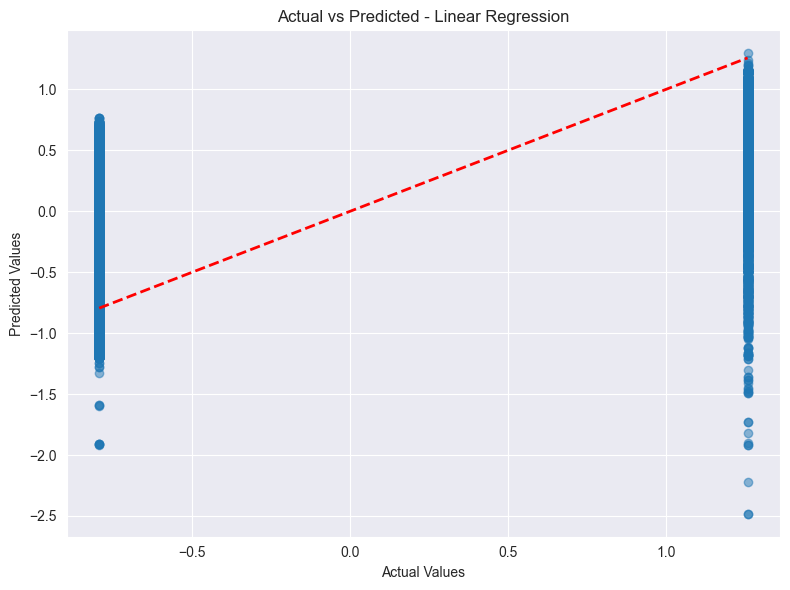


=== Kết quả đánh giá Decision Tree ===
Mean Squared Error: 0.0019
Root Mean Squared Error: 0.0440
Mean Absolute Error: 0.0009
R2 Score: 0.9981
Cross-validation R2 scores: [0.99373215 0.9910618  0.98991128 0.99104345 0.99271851]
Mean CV R2 score: 0.9917 (+/- 0.0027)


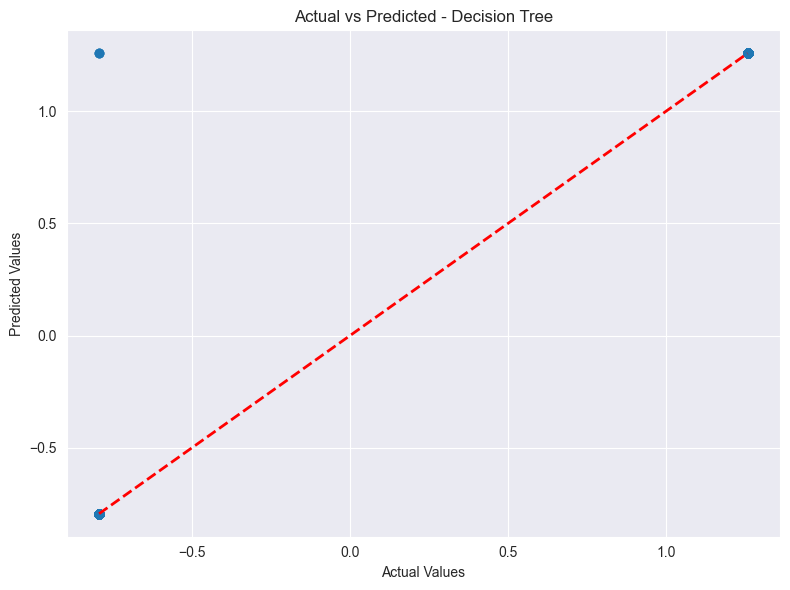


=== Kết quả đánh giá Random Forest ===
Mean Squared Error: 0.0038
Root Mean Squared Error: 0.0613
Mean Absolute Error: 0.0098
R2 Score: 0.9962
Cross-validation R2 scores: [0.99092813 0.99093904 0.99001909 0.99003798 0.99082581]
Mean CV R2 score: 0.9906 (+/- 0.0009)


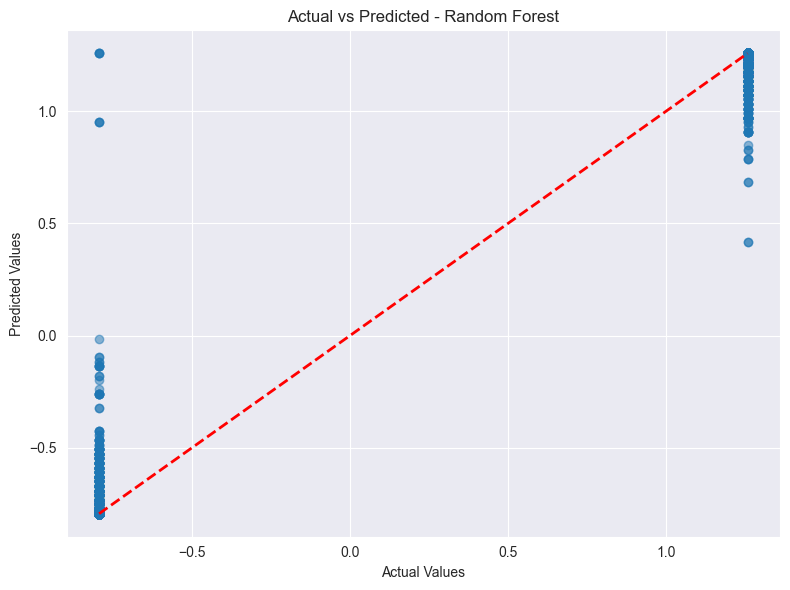


=== Kết quả đánh giá SVR ===
Mean Squared Error: 0.3164
Root Mean Squared Error: 0.5625
Mean Absolute Error: 0.2946
R2 Score: 0.6835
Cross-validation R2 scores: [0.69663444 0.68325132 0.69149315 0.69968091 0.68168328]
Mean CV R2 score: 0.6905 (+/- 0.0142)


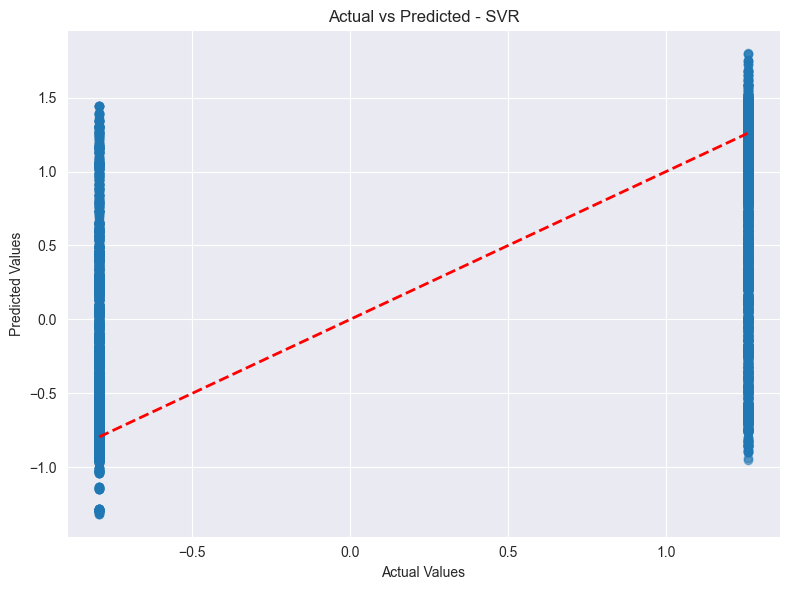


=== Kết quả đánh giá KNN ===
Mean Squared Error: 0.0404
Root Mean Squared Error: 0.2011
Mean Absolute Error: 0.0362
R2 Score: 0.9596
Cross-validation R2 scores: [0.94702974 0.9475534  0.94297436 0.94995358 0.94424462]
Mean CV R2 score: 0.9464 (+/- 0.0050)


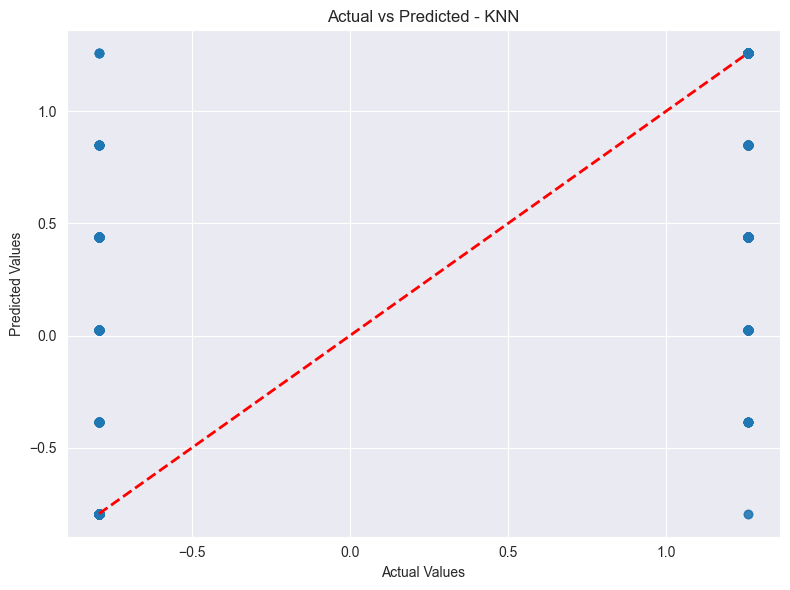


=== Kết quả đánh giá XGBoost ===
Mean Squared Error: 0.0361
Root Mean Squared Error: 0.1900
Mean Absolute Error: 0.0705
R2 Score: 0.9639
Cross-validation R2 scores: [0.96492653 0.96514104 0.96051305 0.96589007 0.96506165]
Mean CV R2 score: 0.9643 (+/- 0.0039)


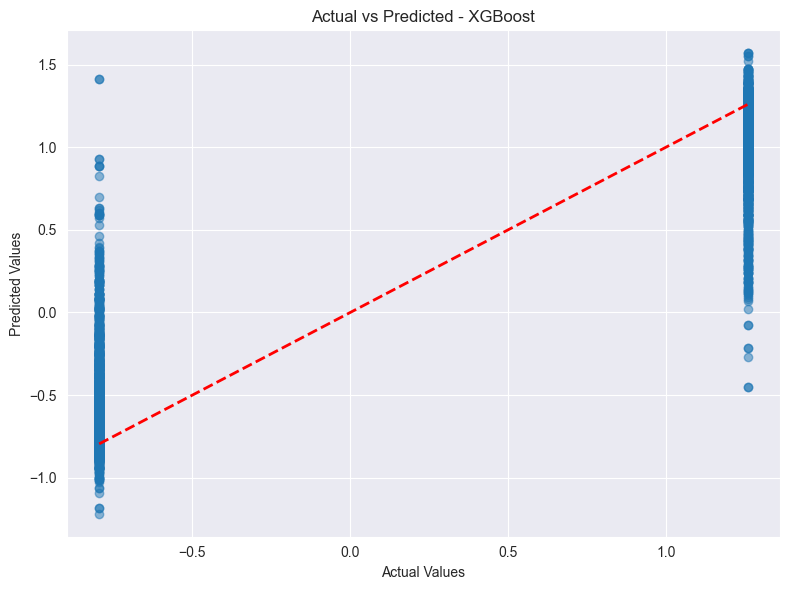


=== 4. So sánh các mô hình ===
               Model  R2 Score  CV R2 Score
1      Decision Tree  0.998061     0.991693
2      Random Forest  0.996244     0.990550
5            XGBoost  0.963905     0.964306
4                KNN  0.959566     0.946351
3                SVR  0.683510     0.690549
0  Linear Regression  0.292420     0.289720


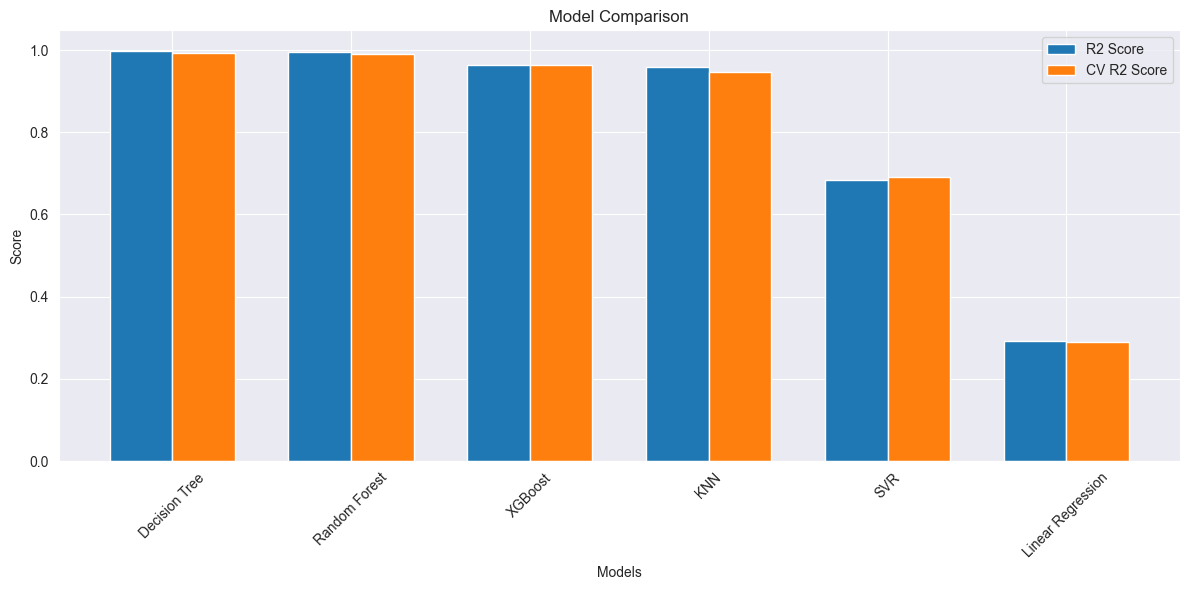

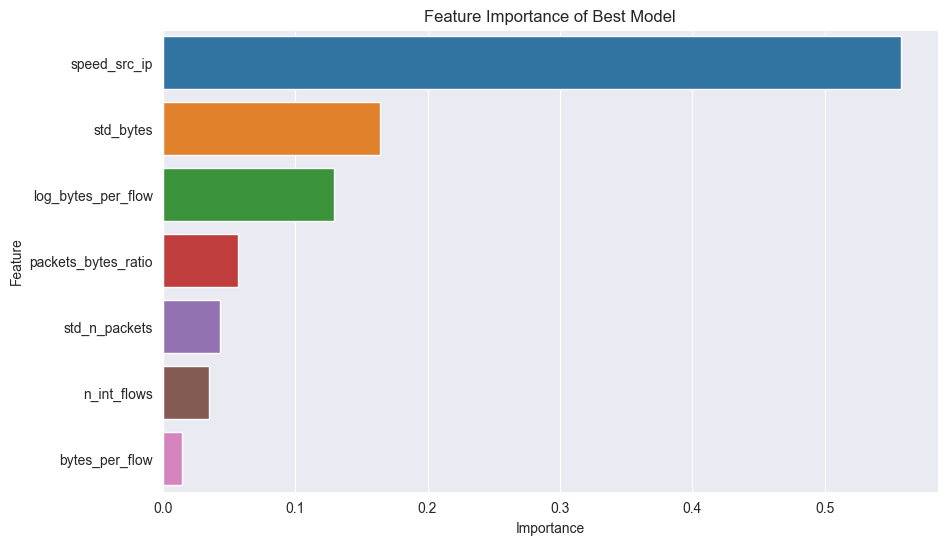


Feature Importance:
               Feature  Importance
0         speed_src_ip    0.557615
2            std_bytes    0.164336
5   log_bytes_per_flow    0.129046
6  packets_bytes_ratio    0.056474
1        std_n_packets    0.042942
4          n_int_flows    0.034700
3       bytes_per_flow    0.014887

=== 5. Kết luận ===

1. Mô hình tốt nhất: Decision Tree
2. R2 Score trên tập test: 0.9981
3. Cross-validation R2 score: 0.9917


Cách sử dụng mô hình đã lưu:
```python
import joblib

# Load mô hình và scaler
model = joblib.load('best_model.joblib')
scaler = joblib.load('scaler.joblib')

# Để dự đoán cho dữ liệu mới X_new:
X_new_scaled = scaler.transform(X_new)
predictions = model.predict(X_new_scaled)
```



In [10]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# 1. Đọc và chuẩn bị dữ liệu
print("=== 1. Đọc và chuẩn bị dữ liệu ===")
# Đọc dữ liệu
df = pd.read_csv('processed_network_flow_data.csv')

# Tách features và target
X = df.drop('class', axis=1)
y = df['class']

# Chia train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Định nghĩa hàm đánh giá mô hình
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train mô hình
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Tính các metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # In kết quả
    print(f"\n=== Kết quả đánh giá {model_name} ===")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Cross-validation R2 scores: {cv_scores}")
    print(f"Mean CV R2 score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

    # Vẽ Scatter plot của giá trị thực tế vs dự đoán
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.tight_layout()
    plt.show()

    return model, r2, cv_scores.mean()

# 3. Train và đánh giá các mô hình
print("\n=== 3. Training và đánh giá các mô hình ===")

# Dictionary để lưu kết quả các mô hình
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100)
}

# Dictionary lưu kết quả đánh giá
results = {}

# Train và đánh giá từng mô hình
for name, model in models.items():
    trained_model, r2, cv_score = evaluate_model(
        model, X_train_scaled, X_test_scaled, y_train, y_test, name
    )
    results[name] = {
        'model': trained_model,
        'r2_score': r2,
        'cv_score': cv_score
    }

# 4. So sánh các mô hình
models_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'R2 Score': [results[model]['r2_score'] for model in results],
    'CV R2 Score': [results[model]['cv_score'] for model in results]
}).sort_values('CV R2 Score', ascending=False)

print("\n=== 4. So sánh các mô hình ===")
print(models_comparison)

# Visualize model comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(models_comparison))
width = 0.35

plt.bar(x - width/2, models_comparison['R2 Score'], width, label='R2 Score')
plt.bar(x + width/2, models_comparison['CV R2 Score'], width, label='CV R2 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, models_comparison['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 5. Chọn và lưu mô hình tốt nhất
best_model_name = models_comparison.iloc[0]['Model']
best_model = results[best_model_name]['model']

# Feature Importance cho mô hình tốt nhất (nếu có)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_imp)
    plt.title('Feature Importance of Best Model')
    plt.show()

    print("\nFeature Importance:")
    print(feature_imp)

# Lưu mô hình tốt nhất và scaler
import joblib
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("\n=== 5. Kết luận ===")
print(f"""
1. Mô hình tốt nhất: {best_model_name}
2. R2 Score trên tập test: {results[best_model_name]['r2_score']:.4f}
3. Cross-validation R2 score: {results[best_model_name]['cv_score']:.4f}
""")

# Thêm thông tin về cách sử dụng mô hình đã lưu
print("""
Cách sử dụng mô hình đã lưu:
```python
import joblib

# Load mô hình và scaler
model = joblib.load('best_model.joblib')
scaler = joblib.load('scaler.joblib')

# Để dự đoán cho dữ liệu mới X_new:
X_new_scaled = scaler.transform(X_new)
predictions = model.predict(X_new_scaled)
```
""")